In [3]:
from torchdiffeq import odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits import mplot3d
from numpy import linalg as la
from scipy import stats
from scipy import spatial as sp
from scipy import integrate as integ 
import pandas as pd
import torch
import torch.nn as nn
from tqdm import tqdm
from ipywidgets import interact



#import Networkx as net
import Plot3D as plot3d
import dataframe as dataframe

# Model 

In [2]:
class SaddleNodeStable:
    def __init__(self, a, b, r):
        #Setting system parameters
        self.a = a
        self.r = r
        self.b = b

    #Differential Equation
    def f(self, t, x):
        xdot = -(x-self.a)*((x-self.b)**2 + self.r(t) )

        return np.array(xdot)

In [3]:
def parameter_f(t):
    out = -0.5 + 0.5*t 
    return out

In [4]:
saddlenode = SaddleNodeStable(a = 0.1, b = 1, r = parameter_f)

In [5]:
class LogisticMap:
    def __init__(self, r):
        self.r = r

    def f(self, t, x):
        xdot = self.r(t)*x*(1-x)
        return np.array(xdot)

# Bifurcation Diagram

## Logistic Map Example

In [6]:
# Time settings
t_Final = 200
t_Start = 0
t_Transient = 100
dt = 1

# Bifurcation parameter range
r_eval = np.arange(0, 4, 0.001)

phi = LogisticMap(r = lambda t: r_eval[0])


In [7]:
x0 = 0.5  # Initial condition
list = []
for r in r_eval:
    phi.r = lambda t: r
    x = []; x.append(x0)
    for i in range(0, int((t_Final - t_Start)/dt)):
        x.append(phi.f(t = i*dt, x = x[i]))

    list.append(np.array(x[t_Transient+1:]))
    


In [8]:
list[0].shape

(100,)

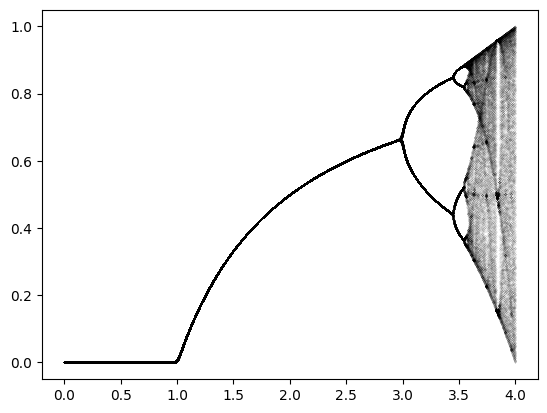

In [9]:
plt.plot(r_eval, list, marker = '.', linestyle = 'None', markersize = 0.05, color = 'black')

## Stable Saddle Node Example

$\dot x = -(x -a)((x - b)^2 - r(t))$

In [162]:
# Setting time 
t_Final = 200
t_Start = 0
t_Transient = 180
dt = 0.01

#Model 
r_eval = np.arange(-1, 1, 0.01)
saddlenode = SaddleNodeStable(a = 0.1, b = 1, r = lambda t: r_eval[0])
x0 = 2.0  # Initial condition

In [163]:
out = integ.solve_ivp(fun = saddlenode.f, t_span = (t_Start, t_Final), y0 = [x0], method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))
out.y
out.y[:, int(t_Transient/dt):]

array([[2., 2., 2., ..., 2., 2., 2.]], shape=(1, 2000))

In [164]:
x0 = [2, 1, 0, -1]  # Initial condition
list = []
for r in r_eval:
    saddlenode.r = lambda t: r
    out = integ.solve_ivp(fun = saddlenode.f, t_span = (t_Start, t_Final), y0 = x0, method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))

    list.append(out.y[:, int(t_Transient/dt):].flatten())

In [168]:
r_eval.shape

(200,)

(-1.0, 3.0)

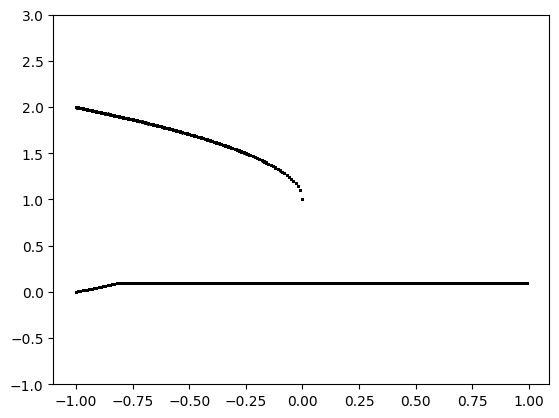

In [165]:
plt.plot(r_eval, list, marker = '.', linestyle = 'None', markersize = 0.1, color = 'black')
plt.ylim(-1, 3)

## Saddle Node - Hysteresis

In [4]:
class SaddleNodeHysteresis2:
    def __init__(self, r):
        #Setting system parameters
        self.r = r
    

    #Differential Equation
    def f(self, t, x):
        xdot = self.r(t) + x - x**3
        return np.array(xdot)

In [5]:
# Setting time 
t_Final = 50
t_Start = 0
t_Transient = 40
dt = 0.01


#Model Parameters

r_eval = np.arange(-3, 3, 0.01)
saddlenode = SaddleNodeHysteresis2(r = lambda t: r_eval[0])
x0 = 2.0  # Initial condition

In [6]:
x0 = np.arange(-3, 3, 0.1)  # Initial condition
list = []
for r in tqdm(r_eval):
    saddlenode.r = lambda t: r
    out = integ.solve_ivp(fun = saddlenode.f, t_span = (t_Start, t_Final), y0 = x0, method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))

    list.append(out.y[:, int(t_Transient/dt):].flatten())

100%|██████████| 600/600 [00:06<00:00, 85.79it/s] 


 ...]

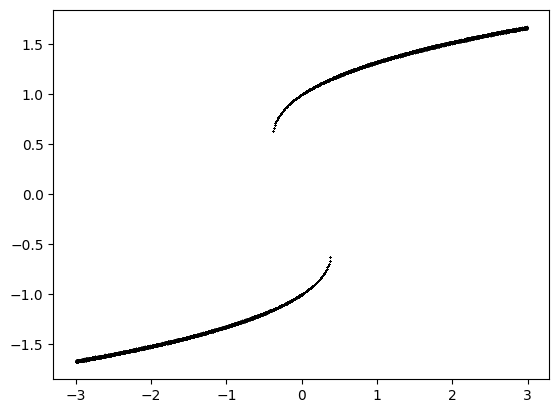

In [7]:
plt.plot(r_eval, list, marker = '.', linestyle = 'None', markersize = 0.05, color = 'black')


## Double Saddle Node

$\dot x = -(-(x-1)^2 - r(t) + 1)(-x^2 + r(t))$

In [233]:
class DoubleSaddleNode:
    def __init__(self, r):
        #Setting system parameters
      
        self.r = r
       

    #Differential Equation
    def f(self, t, x):
        a = -(-(x - 1)**2 - self.r(t) +1 )
        b = -x**2 + self.r(t)
        xdot = a*b 

        return np.array(xdot)

In [8]:
def parameter_g(t):
    if t < 3.0:
        return -0.5 
    elif 6.0 > t >= 3.0:
        return 0.5

In [244]:
# Setting time 
t_Final = 10
t_Start = 0
t_Transient = 8
dt = 0.01

#Model 
r_eval = np.arange(-1, 3, 0.01)
saddlenode = DoubleSaddleNode(r = lambda t: r_eval[0])
x0 = 2.0  # Initial condition

In [245]:
out = integ.solve_ivp(fun = saddlenode.f, t_span = (t_Start, t_Final), y0 = [x0], method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))
out

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.980e+00  9.990e+00]
        y: [[ 2.000e+00  2.048e+00 ...  2.414e+00  2.414e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 458
     njev: 0
      nlu: 0

In [258]:
x0 = [2.0, 1.0, 0.5, 0, -0.1]  # Initial condition
list = []
for r in r_eval:
    saddlenode.r = lambda t: r
    out = integ.solve_ivp(fun = saddlenode.f, t_span = (t_Start, t_Final), y0 = x0, method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))

    list.append(out.y[:, int(t_Transient/dt):].flatten())

## Lorenz System Bifurcation Diagram

In [206]:
class Lorenz_nonauto:
    def __init__(self, rho, sigma = 10, beta = 8/3):
        #Setting system parameters
        self.sigma = sigma
        self.beta = beta
        self.rho = rho #should be a 1D function of time

    #Differential Equation
    def f(self, t, x):
        xdot = [self.sigma*(x[1]-x[0]),
                x[0]*(self.rho(t) - x[2]) - x[1],
                x[0]*x[1] - self.beta*x[2] ]

        return np.array(xdot)

In [220]:
lorenz = Lorenz_nonauto(rho = lambda t: 20.0)
initial_conditions = [[1, 1, 1], [-1, -1, 1]]
r_eval = np.arange(0, 100, 0.01)

## Time 
t_Start = 0; t_Final = 250; t_Transient = 230; dt = 0.01

In [221]:
outputs = []
for y0 in initial_conditions:
    output = integ.solve_ivp(fun = lorenz.f, t_span = (t_Start, t_Final), y0 = y0, method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))
    outputs.append(output.y)

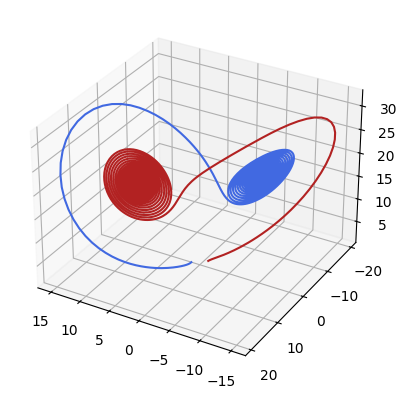

In [222]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.plot(outputs[0][0, :], outputs[0][1, :], outputs[0][2, :], color='royalblue')
ax.plot(outputs[1][0, :], outputs[1][1, :], outputs[1][2, :], color='firebrick')
ax.view_init(elev = 30, azim = 120)


plt.show()

In [223]:

x_list = []
r_list = []
for r in tqdm(r_eval):
    lorenz.rho = lambda t: r
    
    for y0 in initial_conditions:
        output = integ.solve_ivp(fun = lorenz.f, t_span = (t_Start, t_Final), y0 = y0, method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))
        z_plane = r-1
        z = output.y[2, int(t_Transient/dt):]

        #Where does do we cross the plane z = r-1 from below 
        
        indices = np.where((z[:-1] - z_plane)*(z[1:] - z_plane) <= 0)[0]
        for idx in indices:
            x_pts = output.y[0, int(t_Transient/dt):][idx]
            r_list.append(r)
            x_list.append(x_pts)
      
       
        


 27%|██▋       | 2656/10000 [23:22<1:04:38,  1.89it/s]


KeyboardInterrupt: 

In [217]:
len(x_list)

63868

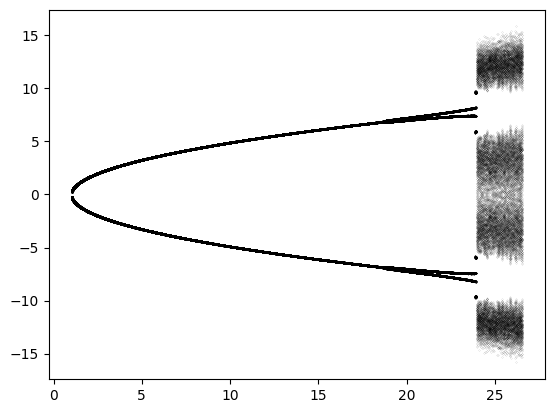

In [224]:
plt.plot(r_list, x_list, marker = '.', linestyle = 'None', markersize = 0.1, color = 'black')

## Class for Diagram 

In [15]:
class CtsDynamicalSystem:
    def __init__(self, f):
        self.f = f #x dot 

    def f(self, t, x):
        return self.f(t, x)
        

In [16]:
class BifurcationDiagram(CtsDynamicalSystem): 
    def __init__(self, f):
        super().__init__(f = f)
    
    def compute_trajectories(self, bifurcation_param_range, t_start, t_final, dt, y0, t_transient):
        pass

# 3D plots

In [17]:
t_Final = 10
t_Start = 0
dt = 0.01
saddlenode.r = lambda t: -1

In [18]:
t_eval = np.arange(t_Start, t_Final, dt)
x_eval = np.arange(-5, 5, 0.01)


x, y = np.meshgrid(t_eval, x_eval)
f = np.vectorize(saddlenode.f)(t=x, x=y)


g = np.zeros_like(f)

In [19]:
output = integ.solve_ivp(fun = saddlenode.f, t_span = (t_Start, t_Final), y0 = [2], method = 'RK45', t_eval = np.arange(t_Start, t_Final, dt))

In [20]:
output.y.shape

(1, 1000)

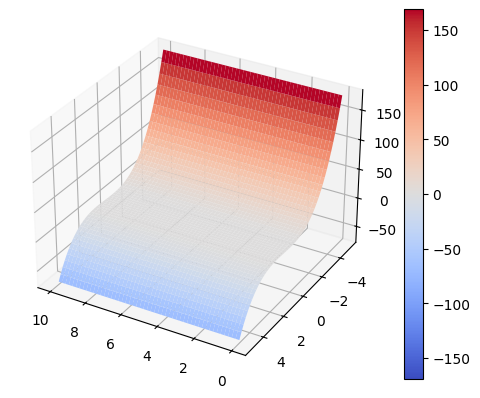

In [21]:

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
cmap = cm.coolwarm
surf = ax.plot_surface(x, y, f, norm=colors.CenteredNorm(), cmap=cmap)
ax.view_init(elev = 30, azim = 120)
#ax.plot(xs=t_eval, ys=output.y[0,:], zs=np.vectorize(saddlenode.f)(t=t_eval, x=output.y[0, :]), color = 'black', linewidth = 5 )
fig.colorbar(surf)
plt.show()